<a href="https://colab.research.google.com/github/mervecaglar0392/Online_Retail/blob/main/Online_Retail%5B1%5D_(16_05_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_excel("Online_Retail[1].xlsx", nrows=1000)
df.head()
#ilk 1000 satir

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df['CustomerID'].isnull().sum()

np.int64(1)

In [13]:
df['Description'].value_counts().head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,10
HAND WARMER UNION JACK,10
HAND WARMER SCOTTY DOG DESIGN,10
RED WOOLLY HOTTIE WHITE HEART.,9
JAM MAKING SET PRINTED,9
SET 2 TEA TOWELS I LOVE LONDON,7
ASSORTED COLOUR BIRD ORNAMENT,7
PACK OF 72 RETROSPOT CAKE CASES,7
SMALL POPCORN HOLDER,7


In [14]:
df['Country'].value_counts().head(10)

,count
Country,
United Kingdom,964
France,20
Australia,14
Netherlands,2


In [15]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [16]:
df['TotalPrice'].sum()

np.float64(24506.25)

In [17]:
df['Description'].value_counts().head(10)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,10
HAND WARMER UNION JACK,10
HAND WARMER SCOTTY DOG DESIGN,10
RED WOOLLY HOTTIE WHITE HEART.,9
JAM MAKING SET PRINTED,9
SET 2 TEA TOWELS I LOVE LONDON,7
ASSORTED COLOUR BIRD ORNAMENT,7
PACK OF 72 RETROSPOT CAKE CASES,7
SMALL POPCORN HOLDER,7


In [18]:
df['Country'].value_counts().head(10)

,count
Country,
United Kingdom,964
France,20
Australia,14
Netherlands,2


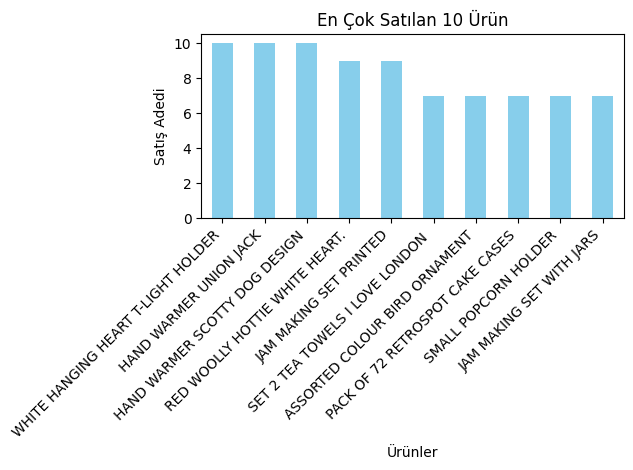

In [20]:
import matplotlib.pyplot as plt

# En çok satılan 10 ürünü seçtik (önceden hesaplamıştık)
top_products = df['Description'].value_counts().head(10)

# Grafik çizimi
top_products.plot(kind='bar', color='skyblue')

plt.title("En Çok Satılan 10 Ürün")
plt.xlabel("Ürünler")
plt.ylabel("Satış Adedi")
plt.xticks(rotation=45, ha='right')  # Ürün isimlerini eğik yazdırır
plt.tight_layout()  # Grafik etiketlerinin görünür olması için

plt.show()


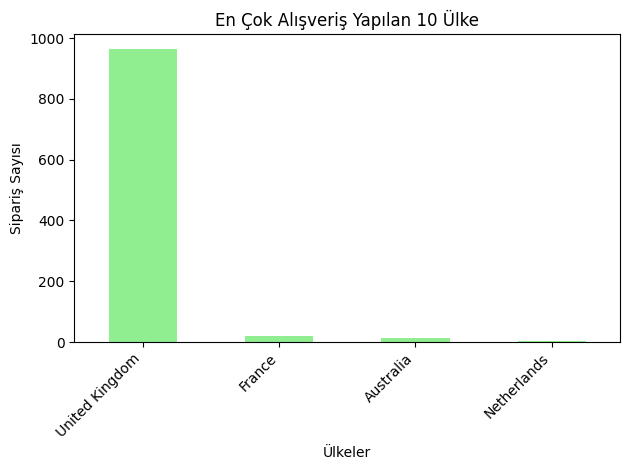

In [21]:
top_countries = df['Country'].value_counts().head(10)

top_countries.plot(kind='bar', color='lightgreen')

plt.title("En Çok Alışveriş Yapılan 10 Ülke")
plt.xlabel("Ülkeler")
plt.ylabel("Sipariş Sayısı")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


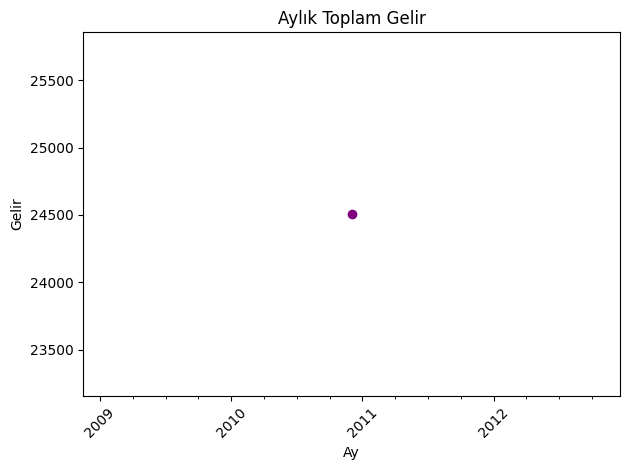

In [22]:
# Tarihi datetime'a çevir
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Ay bilgisi çıkar
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Aylık toplam gelir hesapla
monthly_revenue = df.groupby('InvoiceMonth')['TotalPrice'].sum()

# Grafik
monthly_revenue.plot(kind='line', marker='o', color='purple')
plt.title('Aylık Toplam Gelir')
plt.xlabel('Ay')
plt.ylabel('Gelir')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


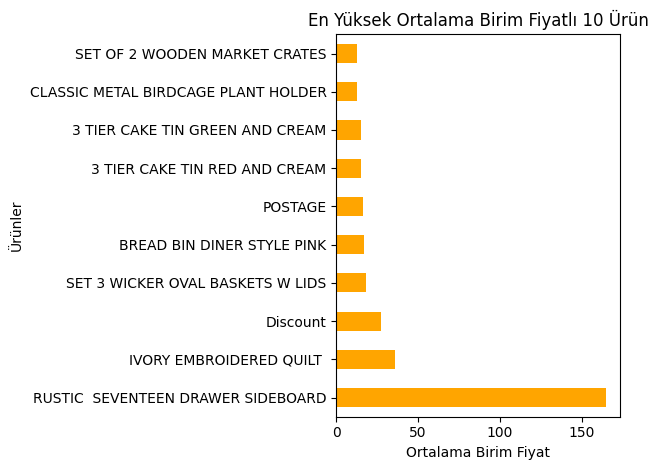

In [23]:
avg_price = df.groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10)

avg_price.plot(kind='barh', color='orange')
plt.title('En Yüksek Ortalama Birim Fiyatlı 10 Ürün')
plt.xlabel('Ortalama Birim Fiyat')
plt.ylabel('Ürünler')
plt.tight_layout()
plt.show()



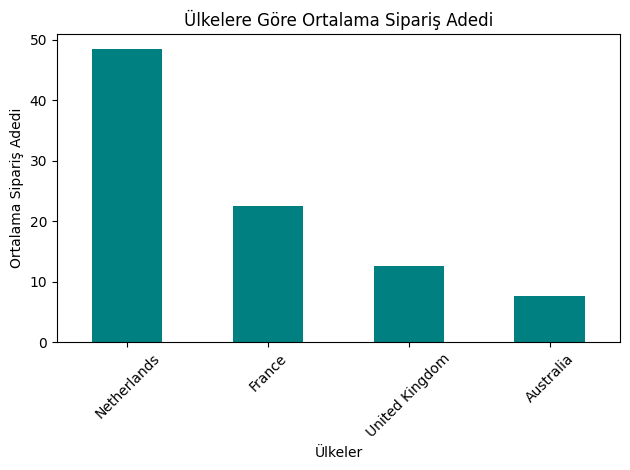

In [24]:
avg_quantity_country = df.groupby('Country')['Quantity'].mean().sort_values(ascending=False).head(10)

avg_quantity_country.plot(kind='bar', color='teal')
plt.title('Ülkelere Göre Ortalama Sipariş Adedi')
plt.xlabel('Ülkeler')
plt.ylabel('Ortalama Sipariş Adedi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


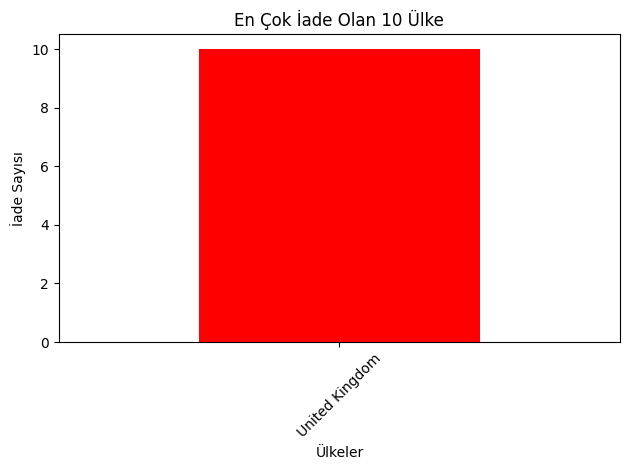

In [25]:
returns = df[df['Quantity'] < 0]
returns_by_country = returns['Country'].value_counts().head(10)

returns_by_country.plot(kind='bar', color='red')
plt.title('En Çok İade Olan 10 Ülke')
plt.xlabel('Ülkeler')
plt.ylabel('İade Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


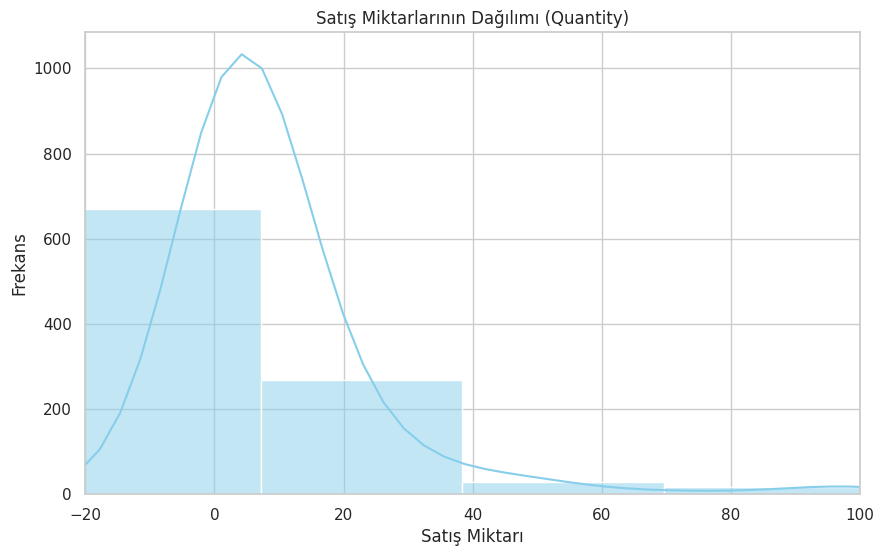

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stili
sns.set(style="whitegrid")

# Histogram çizimi
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=20, kde=True, color='skyblue')
plt.title('Satış Miktarlarının Dağılımı (Quantity)')
plt.xlabel('Satış Miktarı')
plt.ylabel('Frekans')
plt.xlim(-20, 100)  # Uç değerleri sınırla
plt.show()


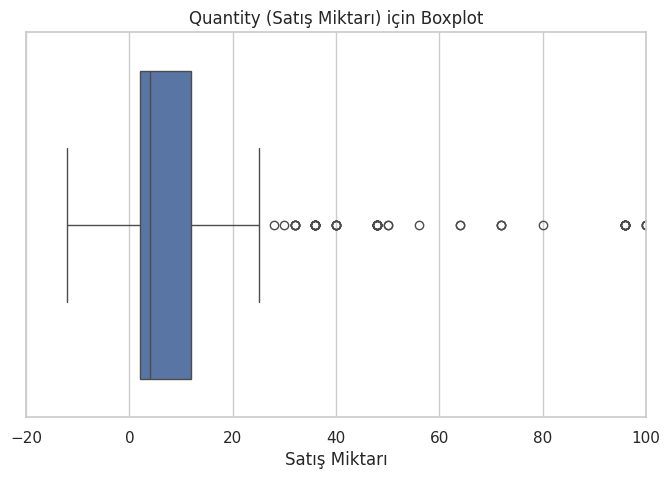

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Quantity'])
plt.title('Quantity (Satış Miktarı) için Boxplot')
plt.xlabel('Satış Miktarı')
plt.xlim(-20, 100)  # Uç değerleri sınırlamak için (isteğe bağlı)
plt.show()


"Online Retail verisini incelediğimizde, satışların büyük kısmının İngiltere'de gerçekleştiğini, ürünlerin çoğunun 1-10 adet aralığında satıldığını ve bazı uç (çok yüksek) siparişlerin bulunduğunu gördük. Ortalama fiyatlar düşük olmasına rağmen, bazı ürünler yüksek fiyatlıydı. Histogram ve boxplotlar bu dağılımları görsel olarak destekledi. Bu analiz sayesinde, firmanın düşük fiyatlı ürünlerde daha fazla hacim yakaladığını, yüksek fiyatlı ürünlerde ise daha az ama belki kârlı satışlar yaptığını anlıyoruz. Gelecek analizlerde müşteri segmentasyonu veya ürün grubu bazlı kazanç analizi yapılabilir."